In [90]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Importo librerías de scikit-learn para los modelos de entrenamiento
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [94]:
# Cargo los datasets procesados
telco_opcion1 = pd.read_csv('C:/Users/joaqpach/Desktop/FA/Ciencia de datos/TP Final/telco_processed1.csv')
telco_reduced = pd.read_csv('C:/Users/joaqpach/Desktop/FA/Ciencia de datos/TP Final/telco_processed2.csv')

In [96]:
telco_opcion1.head(3)

,SeniorCitizen,tenure,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn,OnlineBackup_Yes,...,Contract_Two year,Contract_sin valor,Partner_Yes,Partner_sin valor,gender_Male,gender_sin valor,Dependents_Yes,Dependents_sin valor,PaperlessBilling_Yes,PaperlessBilling_sin valor
0,0.0,34.0,1,0,0,0,0.00,1889.50,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,2.0,0,0,0,0,53.85,108.15,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0.0,8.0,1,0,1,1,99.65,820.50,1,0,...,0,0,0,0,0,0,0,0,0,1


In [98]:
telco_reduced.head(3)

,SeniorCitizen,tenure,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn,OnlineBackup_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,Partner_Yes,Dependents_Yes,PaperlessBilling_Yes
0,0.0,34.0,1,0,0,0,0.00,1889.50,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0.0,2.0,0,0,0,0,53.85,108.15,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0.0,8.0,1,0,1,1,99.65,820.50,1,0,...,0,1,0,1,0,0,0,0,0,0


In [100]:
# Creo funcion para configurar y evaluar modelo
def configurar_y_evaluar_modelo(X_train, y_train, estimador):
    pipeline = Pipeline(
        steps=[
            ("preprocesamiento", ColumnTransformer(
                transformers=[
                    ("num", StandardScaler(), X_train.select_dtypes(include=[np.number]).columns)
                ]
            )),
            ("pca", PCA(n_components=10)),
            ("estimador", estimador)
        ]
    )

    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    
    return mean_cv_score, pipeline

In [102]:
# Creo funcion para entrenar y evaluar cada dataset dado
def entrenar_evaluar(dataset):
    X = dataset.drop(columns='Churn')
    y = dataset['Churn']

    assert X.isnull().sum().sum() == 0, "Todavía hay NaNs en X"
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    modelos = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(),
        "SVC": SVC(probability=True)
    }

    resultados = {}
    for nombre, modelo in modelos.items():
        score, pipeline = configurar_y_evaluar_modelo(X_train, y_train, modelo)
        resultados[nombre] = (score, pipeline)
        print(f"{nombre} Score: {score:.2f}")

    # Selecciono el mejor modelo en funcion del score
    mejor_modelo = max(resultados, key=lambda k: resultados[k][0])
    mejor_score = resultados[mejor_modelo][0]
    mejor_pipeline = resultados[mejor_modelo][1]

    # Entreno el mejor modelo y obtengo predicciones
    mejor_pipeline.fit(X_train, y_train)
    y_pred = mejor_pipeline.predict(X_test)
    
    # Grafico la matriz de confusion del mejor modelo
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {mejor_modelo}')
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.show()

    return resultados, mejor_score, mejor_modelo

Logistic Regression Score: 0.79
Random Forest Score: 0.78
SVC Score: 0.78


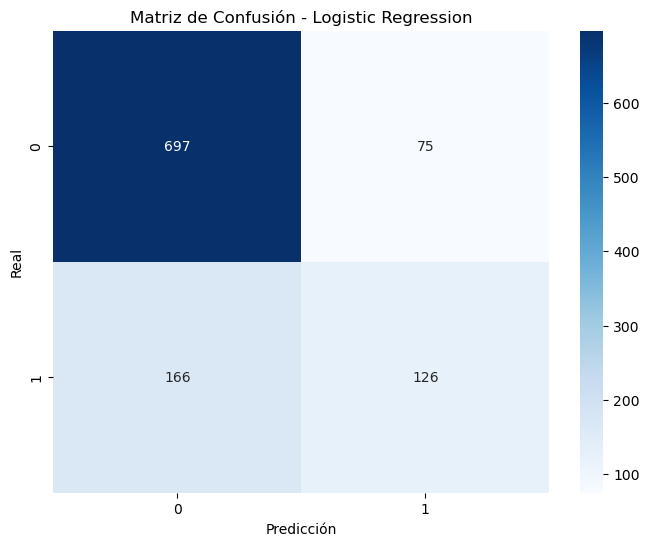

Logistic Regression Score: 0.80
Random Forest Score: 0.78
SVC Score: 0.79


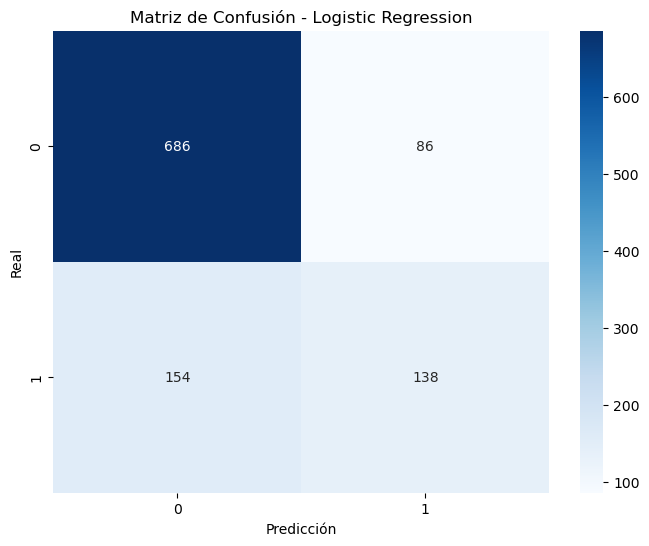

In [104]:
# Entreno y comparo resultados para los dos datasets
resultados_opcion1, mejor_score_opcion1, mejor_modelo_opcion1 = entrenar_evaluar(telco_opcion1)
resultados_reduced, mejor_score_reduced, mejor_modelo_reduced = entrenar_evaluar(telco_reduced)

In [105]:
# Busco cual es el mejor dataset y modelo
if mejor_score_opcion1 > mejor_score_reduced:
    mejor_dataset = 'telco_opcion1'
    mejor_score = mejor_score_opcion1
    mejor_modelo = mejor_modelo_opcion1
else:
    mejor_dataset = 'telco_reduced'
    mejor_score = mejor_score_reduced
    mejor_modelo = mejor_modelo_reduced

print(f"El mejor dataset es {mejor_dataset} con un score de {mejor_score:.2f} utilizando el modelo {mejor_modelo}.")

El mejor dataset es telco_reduced con un score de 0.80 utilizando el modelo Logistic Regression.


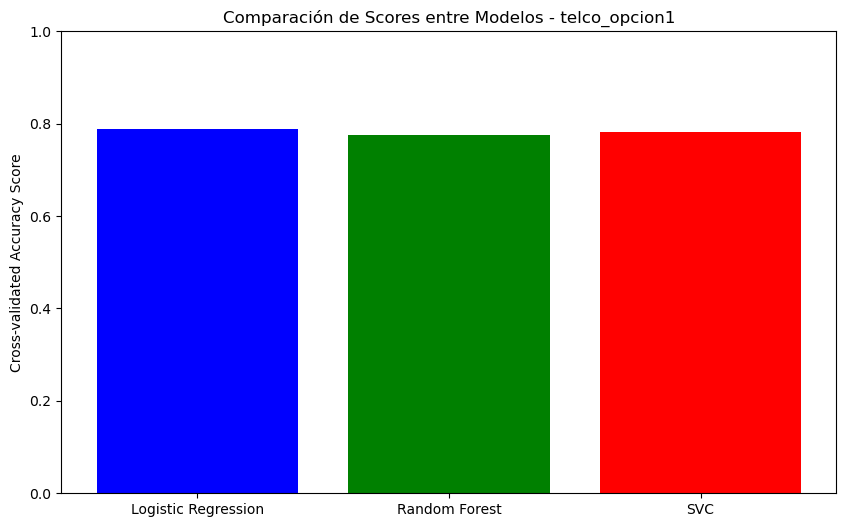

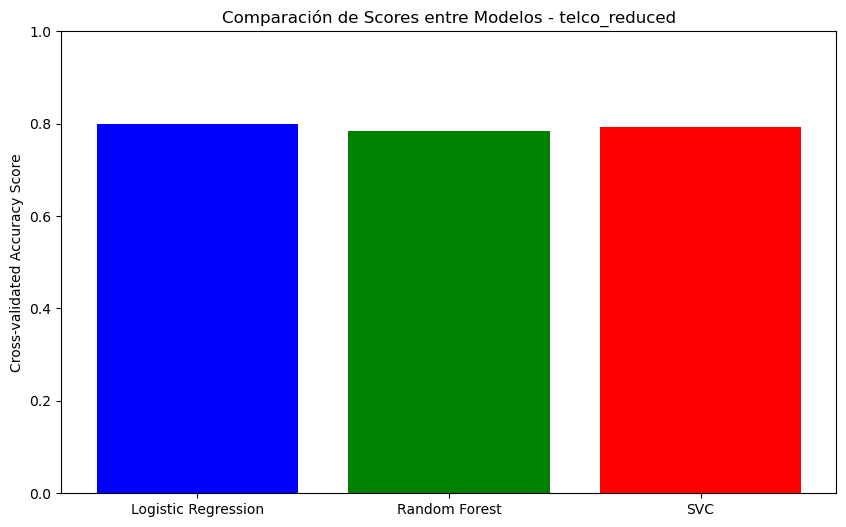

In [106]:
# Grafico los scores de los modelos para cada dataset
def graficar_resultados(resultados, dataset_name):
    labels = resultados.keys()
    scores = [resultados[label][0] for label in labels]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, scores, color=['blue', 'green', 'red'])
    plt.ylabel('Cross-validated Accuracy Score')
    plt.title(f'Comparación de Scores entre Modelos - {dataset_name}')
    plt.ylim(0, 1)
    plt.show()

graficar_resultados(resultados_opcion1, 'telco_opcion1')
graficar_resultados(resultados_reduced, 'telco_reduced')